In [37]:
#impoting libraries
import pandas as pd
import matplotlib.pyplot as plt
import random 
import missingno as msno
import numpy as np

In [2]:
# Imorting data and dividing two diffrent data
df = pd.read_csv("BitcoinHeistData.csv")

whole_white_data = df[df['label']=='white']

black_data = df[df['label']!='white']

In [3]:
# Random selection and down sampling of the white data
whole_white_data.count()
white_data = []
white_data = whole_white_data.iloc[random.sample(range(len(whole_white_data)), 1000000)]



In [4]:
#Previwing both data
print(white_data.head())

print(black_data.head())

                                    address  year  day  length    weight  \
477553   1HRy9wEcCnPRqXFjYMWaqTybv97oSNYoZi  2012   81       0  0.500000   
2177827  1EPvHz6CVSyyLsXXAQp7MWyGRgg4zdRikZ  2016  322     144  0.403834   
2669529  18oufxYacweVhT1gdFix6xzm2MiBB1zXET  2018   83     144  1.944441   
2841113  1Cau4e3DnX6QcdFBmVgWeVF9AXGypxENvk  2018  255     144  0.115758   
1379432  1P1BSrTabBjUxmtDxB9pAionbrqcWVhqNJ  2014  253     144  0.000001   

         count  looped  neighbors        income  label  
477553       1       0          2  3.459346e+09  white  
2177827   1724       0          2  1.274827e+08  white  
2669529   4376    4376          7  5.041599e+08  white  
2841113   6291       0          1  2.594084e+08  white  
1379432   1479    1327          2  1.133300e+08  white  
                              address  year  day  length    weight  count  \
0   111K8kZAEnJg245r2cM6y9zgJGHZtJPy6  2017   11      18  0.008333      1   
1  1123pJv8jzeFQaCV4w644pzQJzVWay2zcA  2016  13

In [7]:
#Seprating black labels
black_data['label']= 'black'

#print(df1.label.unique())

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [8]:
#Appending black data to white data
df1 = black_data.append(white_data)

df1.describe()

,year,day,length,weight,count,looped,neighbors,income
count,1.041413e+06,1.041413e+06,1.041413e+06,1.041413e+06,1.041413e+06,1.041413e+06,1.041413e+06,1.041413e+06
mean,2.014485e+03,1.812706e+02,4.494088e+01,5.424116e-01,7.181745e+02,2.339596e+02,2.175558e+00,4.307784e+09
std,2.240353e+00,1.037652e+02,5.896748e+01,2.862008e+00,1.682773e+03,9.562191e+02,1.297585e+01,1.600180e+11
min,2.011000e+03,1.000000e+00,0.000000e+00,1.420108e-90,1.000000e+00,0.000000e+00,1.000000e+00,3.000000e+07
25%,2.013000e+03,9.100000e+01,2.000000e+00,2.222222e-02,1.000000e+00,0.000000e+00,1.000000e+00,7.466348e+07
50%,2.014000e+03,1.800000e+02,8.000000e+00,2.500000e-01,1.000000e+00,0.000000e+00,2.000000e+00,1.996774e+08
75%,2.016000e+03,2.710000e+02,1.080000e+02,8.953410e-01,5.500000e+01,0.000000e+00,2.000000e+00,9.695500e+08
max,2.018000e+03,3.650000e+02,1.440000e+02,9.748630e+02,1.449700e+04,1.449600e+04,3.776000e+03,4.996440e+13


In [9]:
#viwing data type of columns
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1041413 entries, 0 to 231157
Data columns (total 10 columns):
address      1041413 non-null object
year         1041413 non-null int64
day          1041413 non-null int64
length       1041413 non-null int64
weight       1041413 non-null float64
count        1041413 non-null int64
looped       1041413 non-null int64
neighbors    1041413 non-null int64
income       1041413 non-null float64
label        1041413 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 87.4+ MB


In [10]:
#Changinging data type 'year','day'and 'label' to category
df1['year'] = df1['year'].astype('category')
df1['day'] = df1['day'].astype('category')
df1['label'] = df1['label'].astype('category')
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1041413 entries, 0 to 231157
Data columns (total 10 columns):
address      1041413 non-null object
year         1041413 non-null category
day          1041413 non-null category
length       1041413 non-null int64
weight       1041413 non-null float64
count        1041413 non-null int64
looped       1041413 non-null int64
neighbors    1041413 non-null int64
income       1041413 non-null float64
label        1041413 non-null category
dtypes: category(3), float64(2), int64(4), object(1)
memory usage: 67.5+ MB


In [11]:
#verifing unique years
df1['year'].unique()

[2017, 2016, 2013, 2014, 2015, 2012, 2011, 2018]
Categories (8, int64): [2017, 2016, 2013, 2014, 2015, 2012, 2011, 2018]

In [12]:
#verifing uniqe days
df1['day'].unique()

[11, 132, 246, 322, 238, ..., 129, 42, 15, 16, 365]
Length: 365
Categories (365, int64): [11, 132, 246, 322, ..., 42, 15, 16, 365]

In [13]:
#Checking for duplicates
duplicates = df1.duplicated()

df1[duplicates]


,address,year,day,length,weight,count,looped,neighbors,income,label


In [14]:
#Checking yearly distribution of the data 
df1.groupby('year').count()

,address,day,length,weight,count,looped,neighbors,income,label
year,,,,,,,,,
2011,123883,123883,123883,123883,123883,123883,123883,123883,123883
2012,127574,127574,127574,127574,127574,127574,127574,127574,127574
2013,134610,134610,134610,134610,134610,134610,134610,134610,134610
2014,136740,136740,136740,136740,136740,136740,136740,136740,136740
2015,130517,130517,130517,130517,130517,130517,130517,130517,130517
2016,143027,143027,143027,143027,143027,143027,143027,143027,143027
2017,130191,130191,130191,130191,130191,130191,130191,130191,130191
2018,114871,114871,114871,114871,114871,114871,114871,114871,114871


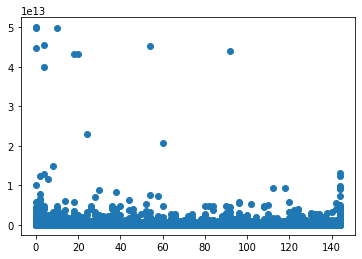

In [15]:
#Visulaising length vs income of data

plt.scatter(x='length' , y = 'income' , data = df1)
plt.show()

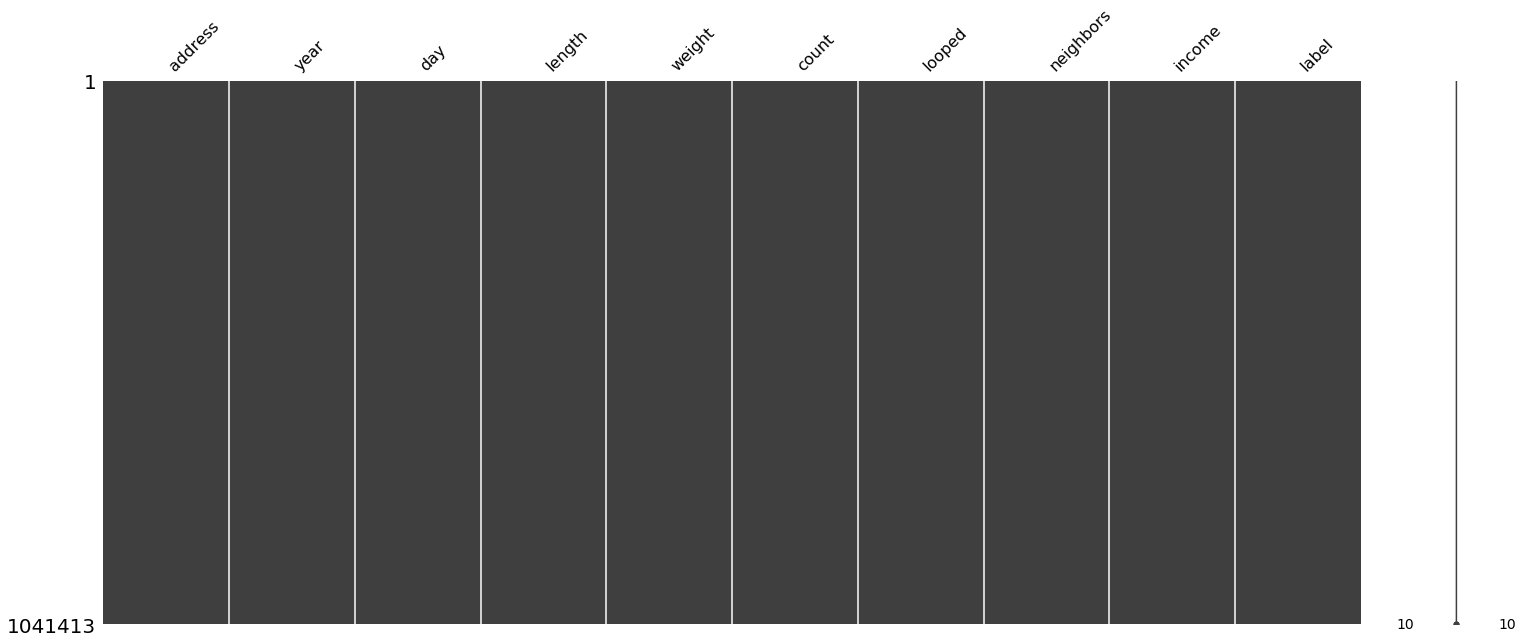

In [16]:
#verifing missing number
msno.matrix(df1)
plt.show()

In [26]:
#duplicate address checking (transactaion from same address)
duplicates1 = df1.duplicated(subset=['address'],keep=False)

df1[duplicates1].groupby('address').count()


,year,day,length,weight,count,looped,neighbors,income,label
address,,,,,,,,,
111213xkVmeHT1v7N7Ff43XmVfLAUq7WEZ,6,6,6,6,6,6,6,6,6
111khWGs3Mj7UgKT7aS6hLsYK11ii4Gmw,4,4,4,4,4,4,4,4,4
1121A3vrYYduVPMnfS87ieHFP2bwy6xriv,5,5,5,5,5,5,5,5,5
1121Sj9pNXPy4qKpRGYvRJKK7d7sCFVPHc,2,2,2,2,2,2,2,2,2
112345FMq98vjXZTbet2nYHtvqX8p9qQKt,5,5,5,5,5,5,5,5,5
112G9vRM7FkrP8HG1kWHZ4Z2GdeUUMnuSi,2,2,2,2,2,2,2,2,2
112KFspUbaqEadpkBa6W5741xP5oFFGo16,2,2,2,2,2,2,2,2,2
112MSLwzfNvTy1abPbMBPsDTDzXcQw5zQn,2,2,2,2,2,2,2,2,2
112PrA8RLcBu8Q14tvmyu7nZGcm2SFrEnd,2,2,2,2,2,2,2,2,2


In [42]:
#duplicate address (transaction on same year)

duplicates2 = df1.duplicated(subset=['address','year'],keep=False)

dup_df1 = df1[duplicates2].groupby(['address','year']).count()

dup_df1

day  length  weight  count  looped  \
address                            year                                       
111213xkVmeHT1v7N7Ff43XmVfLAUq7WEZ 2011  NaN     NaN     NaN    NaN     NaN   
                                   2012  5.0     5.0     5.0    5.0     5.0   
                                   2013  NaN     NaN     NaN    NaN     NaN   
                                   2014  NaN     NaN     NaN    NaN     NaN   
                                   2015  NaN     NaN     NaN    NaN     NaN   
                                   2016  NaN     NaN     NaN    NaN     NaN   
                                   2017  NaN     NaN     NaN    NaN     NaN   
                                   2018  NaN     NaN     NaN    NaN     NaN   
111khWGs3Mj7UgKT7aS6hLsYK11ii4Gmw  2011  NaN     NaN     NaN    NaN     NaN   
                                   2012  NaN     NaN     NaN    NaN     NaN   
                                   2013  NaN     NaN     NaN    NaN     NaN   
                                   2014  NaN     NaN     NaN    NaN     NaN   
                                   2015  3.0     3.0     3.0    3.0     3.0   
                                   2016  NaN     NaN     NaN    NaN     NaN   
                                   2017  NaN     NaN     NaN    NaN     NaN   
                                   2018  NaN     NaN     NaN    NaN     NaN   
1121A3vrYYduVPMnfS87ieHFP2bwy6xriv 2011  NaN     NaN     NaN    NaN     NaN   
                                   2012  NaN     NaN     NaN    NaN     NaN   
                                   2013  NaN     NaN     NaN    NaN     NaN   
                                   2014  NaN     NaN     NaN    NaN     NaN   
                                   2015  NaN     NaN     NaN    NaN     NaN   
                                   2016  3.0     3.0     3.0    3.0     3.0   
                                   2017  2.0     2.0     2.0    2.0     2.0   
                                   2018  NaN     NaN     NaN    NaN     NaN   
1121Sj9pNXPy4qKpRGYvRJKK7d7sCFVPHc 2011  NaN     NaN     NaN    NaN     NaN   
                                   2012  NaN     NaN     NaN    NaN     NaN   
                                   2013  NaN     NaN     NaN    NaN     NaN   
                                   2014  2.0     2.0     2.0    2.0     2.0   
                                   2015  NaN     NaN     NaN    NaN     NaN   
                                   2016  NaN     NaN     NaN    NaN     NaN   
...                                      ...     ...     ...    ...     ...   
3QyUSB4eRYePHcvpS6k6YDMBUDGXRSSMPc 2013  NaN     NaN     NaN    NaN     NaN   
                                   2014  NaN     NaN     NaN    NaN     NaN   
                                   2015  2.0     2.0     2.0    2.0     2.0   
                                   2016  NaN     NaN     NaN    NaN     NaN   
                                   2017  NaN     NaN     NaN    NaN     NaN   
                                   2018  3.0     3.0     3.0    3.0     3.0   
3Qyc2GqLczysrXKCMPeqUXDciyCZ42836q 2011  NaN     NaN     NaN    NaN     NaN   
                                   2012  NaN     NaN     NaN    NaN     NaN   
                                   2013  NaN     NaN     NaN    NaN     NaN   
                                   2014  NaN     NaN     NaN    NaN     NaN   
                                   2015  NaN     NaN     NaN    NaN     NaN   
                                   2016  NaN     NaN     NaN    NaN     NaN   
                                   2017  NaN     NaN     NaN    NaN     NaN   
                                   2018  3.0     3.0     3.0    3.0     3.0   
3QzQ1EbvUkK69TcHsafDTxd4ucAYpJnSXZ 2011  NaN     NaN     NaN    NaN     NaN   
                                   2012  NaN     NaN     NaN    NaN     NaN   
                                   2013  NaN     NaN     NaN    NaN     NaN   
                                   2014  NaN     NaN     NaN    NaN     NaN   
            

In [43]:
#removing NAN value
#dup_df1.agg(lambda x: np.nan if x.isnull().all() else x.dropna())
dup_df1.dropna()

day  length  weight  count  looped  \
address                            year                                       
111213xkVmeHT1v7N7Ff43XmVfLAUq7WEZ 2012  5.0     5.0     5.0    5.0     5.0   
111khWGs3Mj7UgKT7aS6hLsYK11ii4Gmw  2015  3.0     3.0     3.0    3.0     3.0   
1121A3vrYYduVPMnfS87ieHFP2bwy6xriv 2016  3.0     3.0     3.0    3.0     3.0   
                                   2017  2.0     2.0     2.0    2.0     2.0   
1121Sj9pNXPy4qKpRGYvRJKK7d7sCFVPHc 2014  2.0     2.0     2.0    2.0     2.0   
112345FMq98vjXZTbet2nYHtvqX8p9qQKt 2012  4.0     4.0     4.0    4.0     4.0   
112G9vRM7FkrP8HG1kWHZ4Z2GdeUUMnuSi 2012  2.0     2.0     2.0    2.0     2.0   
112KFspUbaqEadpkBa6W5741xP5oFFGo16 2012  2.0     2.0     2.0    2.0     2.0   
112MSLwzfNvTy1abPbMBPsDTDzXcQw5zQn 2014  2.0     2.0     2.0    2.0     2.0   
112PrA8RLcBu8Q14tvmyu7nZGcm2SFrEnd 2013  2.0     2.0     2.0    2.0     2.0   
112RrU2ZjhYGjwAwhgFdg6Q9dSHsZwhMko 2012  2.0     2.0     2.0    2.0     2.0   
112ZuBbDg8opG6MNGQXe3B6Jm1qnRmx3Sk 2015  4.0     4.0     4.0    4.0     4.0   
112cu9E8xZ7Tf8AqfYADgjKzf2epnqTM69 2015  2.0     2.0     2.0    2.0     2.0   
112dfYWENAFrQcjqnuUbEwvBXGJg3pCB8s 2012  2.0     2.0     2.0    2.0     2.0   
112ksQtrGufPKzdD5dtLYpzFhEdtx2Pcyz 2012  4.0     4.0     4.0    4.0     4.0   
112ngz9ScXFpWWJGHAgiuSTFCvdFoBWuyL 2017  2.0     2.0     2.0    2.0     2.0   
112osU8zqMs72oWRRKBDNruZ7qi3dYuHXL 2014  2.0     2.0     2.0    2.0     2.0   
112pom8VszKYbXUEUhLyoRaWgDGVwYyB8n 2013  2.0     2.0     2.0    2.0     2.0   
112r9o1huiATtkWw3jsgEd4LLFw2M54qRM 2011  9.0     9.0     9.0    9.0     9.0   
112uTjxAEfhotGnCvetWPDg1CqqrqEXqRf 2015  2.0     2.0     2.0    2.0     2.0   
112uVomGhrQ8RFTen8qMCH9HjHL5jKraVX 2012  5.0     5.0     5.0    5.0     5.0   
112wED5uHhY1aiSaWAzgeMDaCKFcCvj9Pn 2016  2.0     2.0     2.0    2.0     2.0   
112xbpvg928JF4qGXCcUYEViTQSztbaGng 2011  4.0     4.0     4.0    4.0     4.0   
11359UC52vbJK7hrNji8oAJ1yxYqQqb8du 2012  3.0     3.0     3.0    3.0     3.0   
1137ahaG97BvKhuZaJBJfCNwforMvJ95Xj 2016  2.0     2.0     2.0    2.0     2.0   
1139WLTQ9izukmNpna86K6FLjcSuqY52MR 2012  5.0     5.0     5.0    5.0     5.0   
113B7SiAyJUDJhRLTmnWPdvU79HGTKVi3W 2011  2.0     2.0     2.0    2.0     2.0   
113JHb4ZVYtLD8cbwr7gLcuFqU36SmghS8 2011  3.0     3.0     3.0    3.0     3.0   
                                   2012  4.0     4.0     4.0    4.0     4.0   
113JxW94PF2z8qxhsoMm6K3NWZajnhtAnZ 2018  2.0     2.0     2.0    2.0     2.0   
...                                      ...     ...     ...    ...     ...   
3QcdW7EoWzh4Woi2sxWs7cgC2jHj9sDkPH 2018  2.0     2.0     2.0    2.0     2.0   
3Qcv5tNDSEAjHfKH7qSweBecxqhNd3du9X 2016  2.0     2.0     2.0    2.0     2.0   
3Qd7hXZoZ1iyXZznrbdUwUQBxHMmujdqhJ 2018  2.0     2.0     2.0    2.0     2.0   
3QfP7YUZVgjobLG4bNcTiXPLYjozKws6Uw 2018  2.0     2.0     2.0    2.0     2.0   
3QfvUBKYGnvYvin42Du1GFySBYfNF8wg1R 2018  2.0     2.0     2.0    2.0     2.0   
3Qhuu94CigUHENZEZwGi2YX5M2pQpDHTx1 2018  3.0     3.0     3.0    3.0     3.0   
3QkXtcSWJA9w77eCujnMBKDWFe7F7zwxTg 2015  3.0     3.0     3.0    3.0     3.0   
                                   2016  3.0     3.0     3.0    3.0     3.0   
3QmXZFRPinYQ7GYghDpKeapN7VS47hnbLs 2016  3.0     3.0     3.0    3.0     3.0   
3QnK5QUXeX41kBUMM1LAzDVZzJwzZVXsSg 2018  2.0     2.0     2.0    2.0     2.0   
3QnRfbFutPoqPiiyKE2y1YiHVL2Lfi8THC 2018  2.0     2.0     2.0    2.0     2.0   
3QoWqXpeZ1R5AWMQNUxBtKibzg93MfhVXH 2018  2.0     2.0     2.0    2.0     2.0   
3QokXhzCzmgBXE8uo15NBYG1Yc6j1s66kP 2018  6.0     6.0     6.0    6.0     6.0   
3QorgsdWKX2CvaMDPH5PvRchoz8s9GM2by 2018  2.0     2.0     2.0    2.0     2.0   
3QpPvuk4LUYzDQgHt8zqZqCMugMNxg76W3 2015  2.0     2.0     2.0    2.0     2.0   
3QsVj5S89W5v7r8Qkum8SThYByQW1DixWD 2015  2.0     2.0     2.0    2.0     2.0   
3QstB4HxzeSWoAYWUoLKSCACks4VzhwV96 2016  2.0     2.0     2.0    2.0     2.0   
3QsvYEDQ6AWpprTkd3FrqEL7p6aJ3vTj44 2018  3.0     3.0     3.0    3.0     3.0   
3QtSSGqpBMup

In [33]:
#duplicate address (transaction on same day)

duplicates3 = df1.duplicated(subset=['address','year','day'],keep=False)

df1[duplicates3]

,address,year,day,length,weight,count,looped,neighbors,income,label
